In [ ]:
!gdown --id 1SEpuRaa2MrImxFJpcvteoLn_k-HZpmF_ # Download File https://drive.google.com/file/d/1SEpuRaa2MrImxFJpcvteoLn_k-HZpmF_/view?usp=share_link

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SEpuRaa2MrImxFJpcvteoLn_k-HZpmF_
To: /content/E Commerce Dataset.csv
100% 482k/482k [00:00<00:00, 117MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('E Commerce Dataset.csv', sep=';')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


# Stage 1 - EDA

## **1. Statistical Descriptive**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
nums = ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

In [ ]:
df[cats].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [ ]:
df[nums].describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



1. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? <br>
Kolom yang perlu diubah tipe datanya:
   - CustomerID → object
   - CityTier → Object
   - CouponUsed → Int64
   - DaySinceLastOrder → Int64
   - OrderCount → int64

2. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? <br>
Terdapat beberapa kolom yang memiliki null value seperti: 
   - Tenure
   - WarehouseToHome
   - HourSpendOnApp
   - OrderAmountHikeFromlastYear
   - CouponUsed
   - OrderCount
   - DaySinceLastOrder
   - CashbackAmount
3. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) <br>
    Terdapat beberapa kolom yang memiliki data yang agak aneh seperti:
   - WarehouseToHome, nilai mean (15.6) berbeda jauh dengan max (127)
   - NumberOfAddress, nilai mean (4.2) berbeda jauh dengan max (22) <br> <br>
    Pada feature kategorikal terdapat beberapa kategori memiliki pengertian yang sama seperti:
   - PreferredLoginDevice (Mobile Phone - Phone)
   - PreferredPaymentMethod (Cash on Delivery - COD & Credit Card - CC)
   - PreferredOrderCat (Mobile - Mobile Phone)

## **2. Univariate Analysis**

In [ ]:
cats = ['CustomerID', 'Churn', 'PreferredLoginDevice','CityTier',  'PreferredPaymentMode', 'Gender', 'PreferedOrderCat','Complain',  'MaritalStatus']
nums = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress','OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

Text(0.5, 1.05, 'Apakah ada outliers pada feature?')

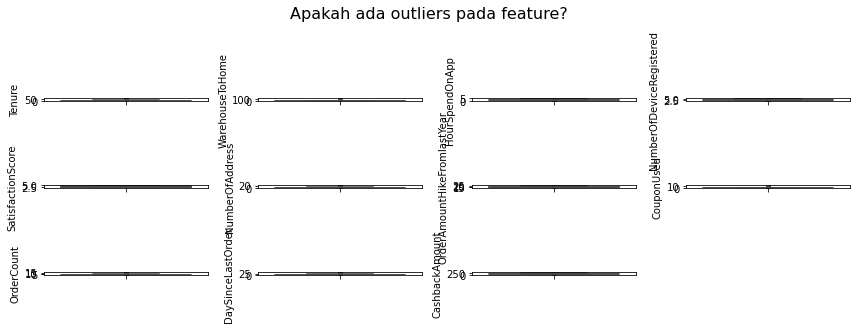

In [ ]:
plt.figure(figsize=(12,6))
for i in range(0, len(nums)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df[nums[i]], color='chocolate')
    plt.tight_layout()
plt.suptitle('Apakah ada outliers pada feature?', y=1.05, size=16)
# plt.savefig('image/boxplot.png')

Text(0.5, 1.05, 'Bagaimana distribusi pada feature?')

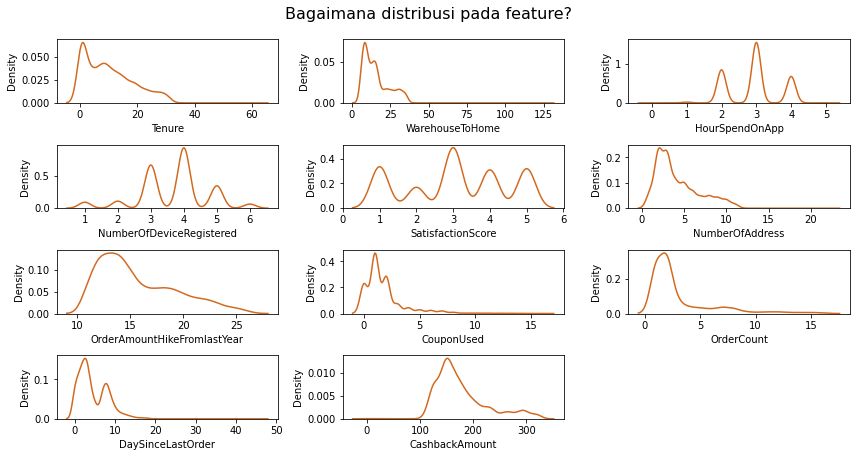

In [ ]:
plt.figure(figsize=(12,6))
for i in range(0, len(nums)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=df[nums[i]], color='chocolate')
    plt.tight_layout()
plt.suptitle('Bagaimana distribusi pada feature?', y=1.05, size=16)
# plt.savefig('image/kdeplot.png')

Text(0.5, 1.05, 'Bagaimana distribusi pada feature?')

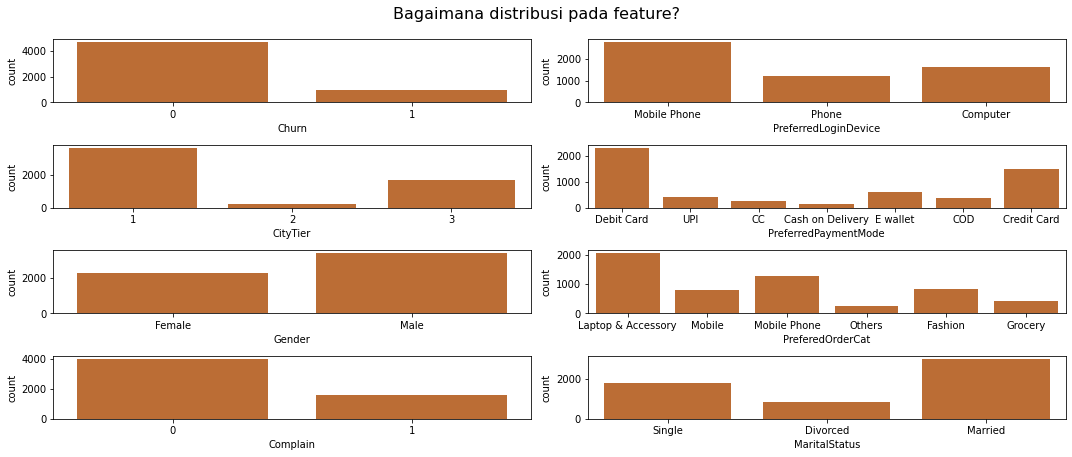

In [ ]:
# kolom = ['Churn', 'PreferredLoginDevice','CityTier',  'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'PreferedOrderCat','Complain',  'MaritalStatus']
plt.figure(figsize=(15,6))
for i in range(0, len(cats[1:])):
    plt.subplot(4, 2, i+1)
    sns.countplot(df[cats[1:][i]], color='chocolate')
    plt.tight_layout()
plt.suptitle('Bagaimana distribusi pada feature?', y=1.05, size=16)
# plt.savefig('image/countplot.png')

**Insight:**
1. Hampir keseluruhan feature memiliki nilai outliers kecuali SatisfactionScore
2. Terdapat beberapa feature yang memiliki distribusi right skew, seperti:
   - Tenure
   - WarehouseToHome
   - NumberOfAddress
   - OrderAmountHikeFromlastYear
   - CouponUsed
   - OrderCount
   - DaySinceLastOrder
3. Terdapat beberapa feature yang memiliki bimodal, seperti HourSpendOnApp, NumberOfDeviceRegistered dan SatisfactionScore
4. Pada feature kategorikal terdapat beberapa kategori memiliki pengertian yang sama seperti:
    - PreferredLoginDevice (Mobile Phone - Phone)
    - PreferredPaymentMethod (Cash on Delivery - COD & Credit Card - CC)
    - PreferredOrderCat (Mobile - Mobile Phone)


## **3. Multivariate Analysis**

Text(0.4, 0.92, 'Correlation Heatmap')

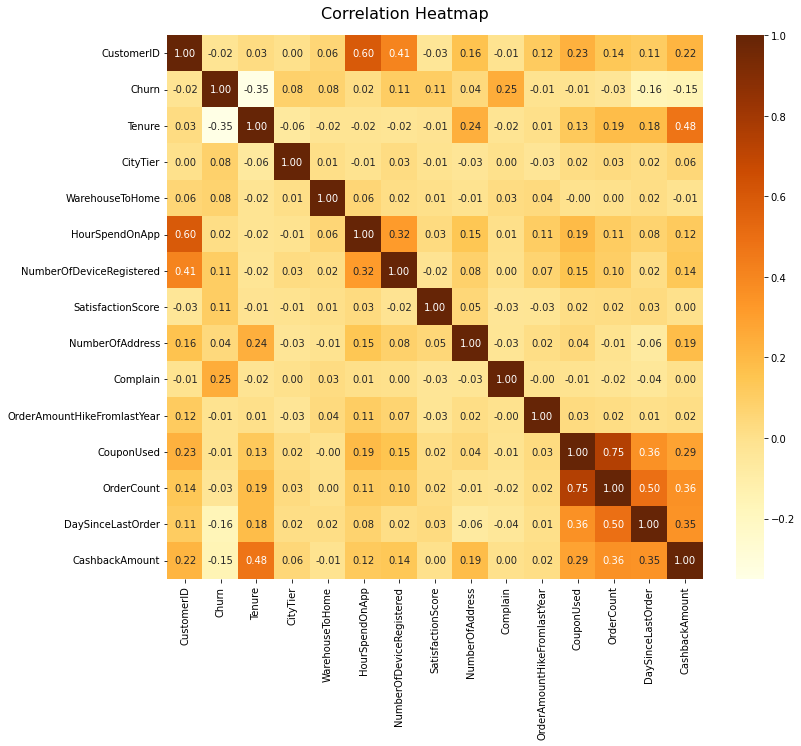

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='YlOrBr', annot=True, fmt='.2f')
plt.suptitle('Correlation Heatmap',x=0.4, y=0.92, size=16)
# plt.savefig('image/heatmap.png')

**Insight:**
1. Terdapat korelasi yang cukup kuat antara feature Tenure dan label (Churn) sebesar -0.35 (negative correlation) yang berarti semakin tinggi nilai tenure maka semakin kecil kemungkinan untuk churn.
2. Terdapat korelasi antara feature Complain dan label (Churn) sebesar 0.25 (positive correlation) yang berarti semakin tinggi nilai complain, semakin tinggi kemungkinan untuk churn.


In [ ]:
def churn_plot(x):
    df_cats = df.copy()
    df_city = df_cats.groupby(x)['CustomerID'].nunique().reset_index(name='Total')
    df_churn =  df_cats.groupby([x, 'Churn'])['CustomerID'].nunique().reset_index(name='TotalCustomer')
    df_merge = df_churn.merge(df_city, on=x)
    df_merge['Percentage'] = round(df_merge['TotalCustomer']/df_merge['Total']*100,2)
    
    return df_merge

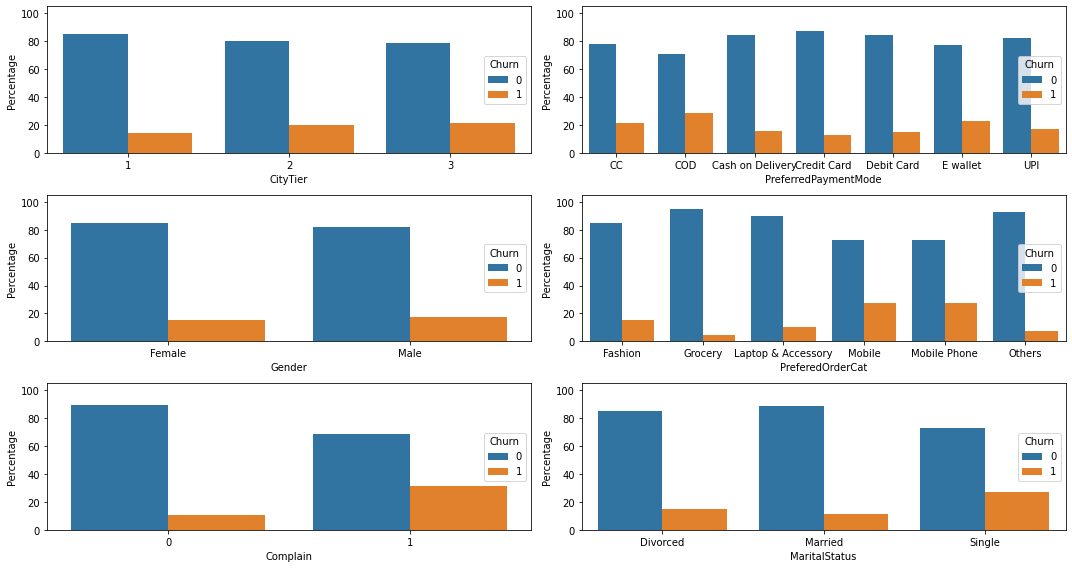

In [ ]:
kolom = cats[3:]
plt.figure(figsize=(15,8))
for i in range(0, len(kolom)):
    plt.subplot(3, 2, i+1)
    data = churn_plot(kolom[i])
    ax = sns.barplot(x=kolom[i], y='Percentage', data=data, hue = 'Churn')

    for container in ax.containers:
        # ax.bar_label(container, fontsize=9, fmt='%.1f%%')
        ax.set_ylim(top=105)
        ax.legend(loc='center right', title='Churn')
    plt.tight_layout()
# plt.savefig('image/Churn Category.png')

**Insight:**
1. Customer yang berada pada CityTier 3 memiliki kemungkinan Churn tertinggi yaitu sebesar 21.4%
2. Customer laki-laki memiliki kemungkinan Churn yang lebih tinggi yaitu sebesar 17.7%
3. Customer yang melakukan Complain memiliki kemungkinan Churn yang lebih tinggi yaitu sebesar 31.7%
4. Customer yang menggunakan metode pembayaran COD kemungkinan Churn tertinggi yaitu 28.8%
5. Customer yang melakukan transaksi pada kategori Mobile dan Mobile Phone memiliki kemungkinan untuk Churn di atas 27%
6. Customer dengan status Single memiliki kemungkinan Churn yang lebih tinggi yaitu 26.7%


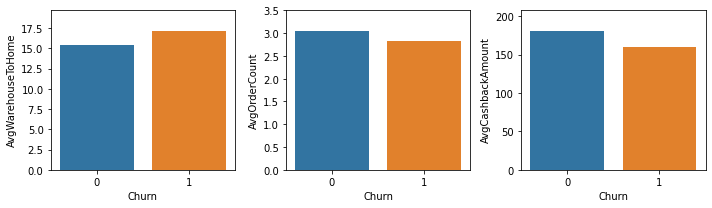

In [ ]:
kolom = ['WarehouseToHome', 'OrderCount', 'CashbackAmount']
plt.figure(figsize=(10,3))
for i in range(0, len(kolom)):
    plt.subplot(1, 3, i+1)
    data = df.copy()
    data = data.groupby('Churn')[kolom[i]].mean().reset_index(name='Avg'+ kolom[i])
    ax = sns.barplot(x='Churn', y='Avg'+kolom[i], data=data)

    for container in ax.containers:
        # ax.bar_label(container, fontsize=11, fmt='%.2f')
        ax.set_ylim(top=ax.get_ylim()[1]*1.1)
    plt.tight_layout()
# plt.savefig('image/Churn Numerical.png')

**Insight:**
1. Customer yang Churn memiliki jarak yang lebih jauh dengan rata-rata jarak sebesar 17.13
2. Customer yang Churn melakukan order yang lebih sedikit dengan rata-rata order sebesar 2.82
3. Customer yang Churn mendapatkan Cashback yang lebih sedikit dengan rata-rata Cashback sebesar 160.37


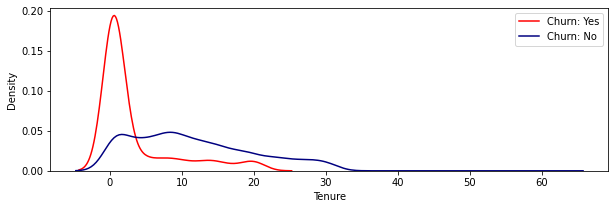

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.kdeplot(df[df['Churn'] == 1]['Tenure'].dropna(), color= 'red', label= 'Churn: Yes', ax=ax)
sns.kdeplot(df[df['Churn'] == 0]['Tenure'].dropna(), color= 'navy', label= 'Churn: No', ax=ax)
plt.legend(loc = 1)
# plt.savefig('image/Churn Tenure.png')

**Insight**:

Dari grafik di atas dapat diketahui pada Tenure di bawah 5 kemungkinan customer untuk Churn sangat tinggi dan semakin lama masa berlangganan maka semakin sedikit pula kemungkinan Customer untuk Churn.

## **4. Business Insight**

1. Pelanggan banyak melakukan churn pada saat tenure berapa bulan?

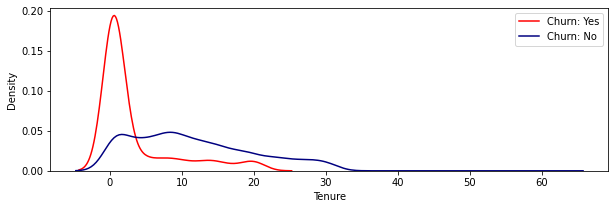

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.kdeplot(df[df['Churn'] == 1]['Tenure'].dropna(), color= 'red', label= 'Churn: Yes', ax=ax)
sns.kdeplot(df[df['Churn'] == 0]['Tenure'].dropna(), color= 'navy', label= 'Churn: No', ax=ax)
plt.legend(loc = 1)

**Insight:** 

Dari grafik diatas dapat kita ketahui bahwa Customer akan Churn pada bulan-bulan awal memakai platform E-Commerce. Pada Heatmap juga memiliki skor -0.35, yang berarti bahwa semakin lama masa berlangganan maka semakin sedikit pula kemungkinan Customer untuk Churn. Rekomendasi untuk bisnis adalah, pada saat bulan-bulan awal perlu dilakukan langkah-langkah konkret untuk mempertahankan Customer agar tetap melakukan transaksi di E-Commerce PT. Numero Uno salah satunya adalah Pemberian Cashback (sebagaimana angka yang ditunjukan di heatmap, korelasi antara tenure dengan cashbackamount adalah 0.48)

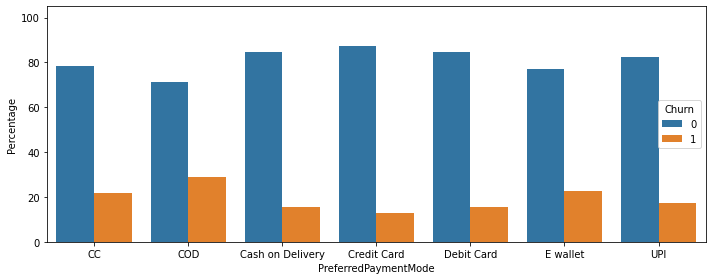

In [ ]:
kolom = 'PreferredPaymentMode'
plt.figure(figsize=(10,4))
data = churn_plot(kolom)
ax = sns.barplot(x=kolom, y='Percentage', data=data, hue = 'Churn')

for container in ax.containers:
    # ax.bar_label(container, fontsize=9, fmt='%.1f%%')
    ax.set_ylim(top=105)
    ax.legend(loc=7, title='Churn')
plt.tight_layout()
# plt.savefig('image/Churn Payment Method.png')

**Insight:**

Dari grafik diatas dapat diketahui bahwa customer yang melakukan transaksi menggunakan metode COD memiliki kemungkinan Churn yang tertinggi dengan persentase 28.8%. Oleh karenanya kami menyarankan untuk meninjau kembali kualitas pelayanan pada metode pembayaran tersebut.

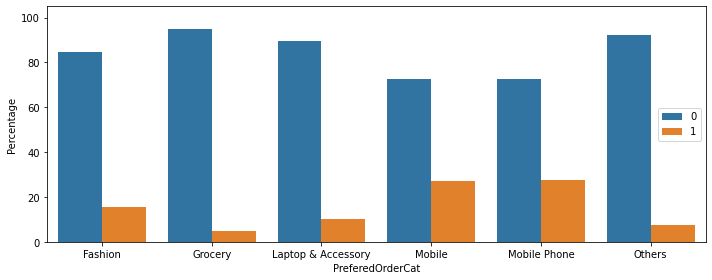

In [ ]:
kolom = 'PreferedOrderCat'
plt.figure(figsize=(10,4))
data = churn_plot(kolom)
ax = sns.barplot(x=kolom, y='Percentage', data=data, hue = 'Churn')

for container in ax.containers:
    # ax.bar_label(container, fontsize=9, fmt='%.1f%%')
    ax.set_ylim(top=105)
    ax.legend(loc='center right')
plt.tight_layout()
# plt.savefig('image/Churn Order Category.png')

**Insight:** 

Dari grafik diatas dapat diketahui bahwa customer yang melakukan transaksi pada kategori Mobile dan Mobile Phone memiliki kemungkinan Churn yang tertinggi dengan persentase lebih dari 27%. Oleh karenanya kami menyarankan untuk meninjau kembali kualitas produk yang ditawarkan pada kedua kategori tersebut.

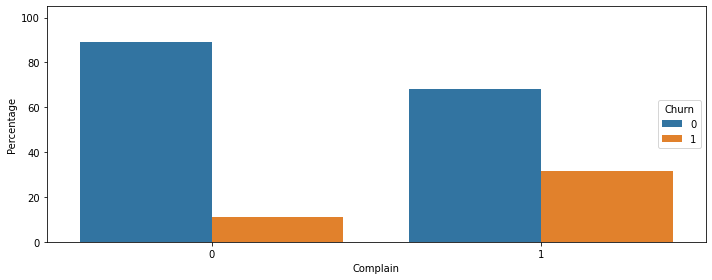

In [ ]:
plt.figure(figsize=(10,4))
data = churn_plot('Complain')
ax = sns.barplot(x='Complain', y='Percentage', data=data, hue = 'Churn')

for container in ax.containers:
    # ax.bar_label(container, fontsize=11, fmt='%.2f%%')
    ax.set_ylim(top=105)
    ax.legend(loc=7, title='Churn')
plt.tight_layout()
# plt.savefig('image/Churn Complain.png')

**Insight:**

Dari grafik di atas dapat diketahui bahwa Complain banyak dilakukan oleh customer yang Churn sehingga customer yang Complain memiliki kemungkinan yang tinggi untuk Churn yakni sebesar 31.67%. Pada Heatmap juga memiliki korelasi sebesar 0.25, yang berarti bahwa semakin tinggi Jumlah Complain maka semakin tinggi pula kemungkinan Customer untuk Churn. Kami menyarankan untuk mengelompokkan jenis complain yang diterima sehingga dapat memberikan keputusan lebih bijak sesuai dengan kategori complain. Selain itu, kami juga menyarankan untuk meningkatkan kualitas pelayanan ecommerce agar complain menurun dan customer yang churn menurun.

# Stage 2 - Data Pre-processing

## 1. Data Cleaning

### Handle Missing Values

In [ ]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Berdasarkan hasil Statistical Descriptive, maka yang akan kami lakukan untuk mengatasi missing value sebagai berikut:
- `Tenure`: Imputasi menggunakan nilai median karena memiliki distribusi skewed
- `WarehouseToHome`: Imputasi menggunakan nilai median karena memiliki distribusi skewed
- `OrderAmountHikeFromlastYear`: Imputasi menggunakan nilai median karena memiliki distribusi skewed
- `CouponUsed`: Imputasi menggunakan nilai median karena memiliki distribusi skewed
- `OrderCount`: Imputasi menggunakan nilai median karena memiliki distribusi skewed
- `DaySinceLastOrder`: Imputasi menggunakan nilai median karena memiliki distribusi skewed
- `HourSpendOnApp`: Imputasi menggunakan nilai modus

In [ ]:
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mode()[0], inplace=True)

In [ ]:
df['CouponUsed'] = df['CouponUsed'].astype(int)
df['OrderCount'] = df['OrderCount'].astype(int)
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].astype(int)

In [ ]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### Handling Duplicated Data

In [ ]:
df.duplicated(subset=['CustomerID']).sum()

0

Tidak terdapat data duplikat

### Handling Outliers

In [ ]:
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
nums = ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

In [ ]:
from scipy import stats

In [ ]:
df_iqr = df.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(df_iqr)}')

filtered_entries = np.array([True] * len(df_iqr))
for col in nums:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_iqr[col] >= low_limit) & (df_iqr[col] <= high_limit)) & filtered_entries
    
df_iqr = df_iqr[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_iqr)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 3316


In [ ]:
dfz = df.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(dfz)}')

filtered_entries = np.array([True] * len(dfz))

for col in nums:
    zscore = abs(stats.zscore(dfz[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
dfz = dfz[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(dfz)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5348


- IQR: data yang terbuang sebanyak 1590 atau sebesar 28.2%
- Z-score: data yang terbuang sebanyak 282 atau sebesar 5%

Kami memutuskan menggunakan nilai Z-score untuk mengatasi nilai outliers dikarenakan jumlah data yang terbuang jauh lebih kecil dibandingkan IQR

In [ ]:
df = dfz.copy()

## 2. Feature Extraction

Dari hasil EDA, terdapat beberapa feature yang memerlukan penyesuaian seperti:
- PreferredLoginDevice, menggabungkan kategori **Phone** dan **Mobile Phone** -> **Phone**
- PreferredPaymentMode, menggabungkan kategori **CC** dan **Credit Card** -> **Credit Card**
- PreferredPaymentMode, menggabungkan ketegori **COD** dan **Cash on Delivery** -> **Cash on Delivery**
- PreferedOrderCat, menggabungkan kategori **Mobile** dan **Mobile Phone** -> **Mobile Phone**
- MaritalStatus, Menggabungkan ketegori **Divorced** dan **Single** -> **Single**

Terdapat feature baru yang bisa dibuat, antara lain:
- AvgCashback, Rata-rata cashback per item (CashbackAmount / OrderCount)

In [ ]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2193
Credit Card         1413
E wallet             579
UPI                  401
COD                  355
CC                   273
Cash on Delivery     134
Name: PreferredPaymentMode, dtype: int64

In [ ]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace(['Phone','Mobile Phone'], ['Handphone', 'Handphone'])
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(['CC','COD'], ['Credit Card','Cash on Delivery'])
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace(['Mobile','Mobile Phone'], ['Handphone & Accessory', 'Handphone & Accessory'])
df['MaritalStatus'] = df['MaritalStatus'].replace(['Divorced'], ['Single'])

In [ ]:
df['AvgCashback'] = df['CashbackAmount'] / df['OrderCount']

## 3. Feature Transformation

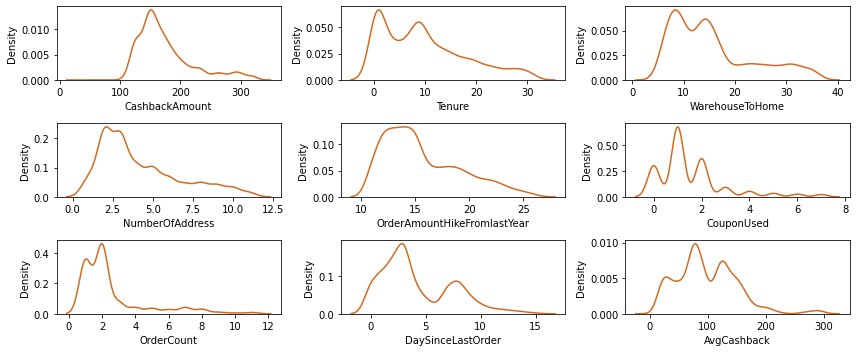

In [ ]:
kolom = ['CashbackAmount', 'Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'AvgCashback']
plt.figure(figsize=(12,5))
for i in range(0, len(kolom)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[kolom[i]], color='chocolate')
    plt.tight_layout()
# plt.suptitle('Bagaimana distribusi pada feature?', y=1.05, size=16)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Trial

##### Std

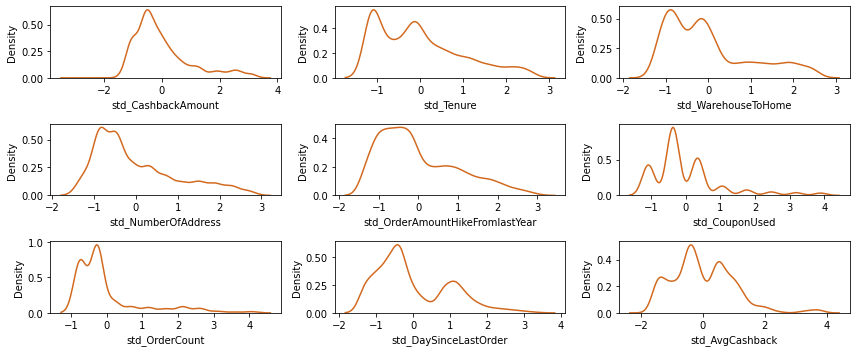

In [ ]:
df_trial = df.copy()
kolom = ['CashbackAmount', 'Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'AvgCashback']
plt.figure(figsize=(12,5))
for i in range(0, len(kolom)):
    plt.subplot(3, 3, i+1)
    nama = 'std_' + kolom[i]
    df_trial[nama] = StandardScaler().fit_transform(df_trial[kolom[i]].values.reshape(len(df_trial), 1))
    sns.kdeplot(df_trial[nama], color='chocolate')
    plt.tight_layout()

In [ ]:
df_trial.describe() # std

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,AvgCashback,std_CashbackAmount,std_Tenure,std_WarehouseToHome,std_NumberOfAddress,std_OrderAmountHikeFromlastYear,std_CouponUsed,std_OrderCount,std_DaySinceLastOrder,std_AvgCashback
count,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,...,5348.000000,5.348000e+03,5.348000e+03,5.348000e+03,5.348000e+03,5.348000e+03,5348.000000,5.348000e+03,5348.000000,5.348000e+03
mean,52802.314136,0.170531,9.802169,1.652954,15.541885,2.929693,3.674271,3.056470,4.196896,0.286462,...,98.740215,-6.377347e-17,5.314456e-18,3.720119e-17,-1.700626e-16,-1.806915e-16,0.000000,-7.440238e-17,0.000000,3.401252e-16
std,1627.307193,0.376134,8.179521,0.913900,8.067459,0.702072,1.025263,1.379059,2.544890,0.452150,...,51.936847,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094,1.000094e+00,1.000094,1.000094e+00
min,50001.000000,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,4.111111,-2.961788e+00,-1.198491e+00,-1.306839e+00,-1.256319e+00,-1.304523e+00,-1.078633,-7.473358e-01,-1.294175,-1.822174e+00
25%,51393.750000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,...,63.500000,-6.358778e-01,-9.539555e-01,-8.109736e-01,-8.633384e-01,-7.445370e-01,-0.369620,-7.473358e-01,-0.682190,-6.785839e-01
50%,52783.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,...,89.500000,-2.912985e-01,-9.807959e-02,-1.911418e-01,-4.703574e-01,-1.845505e-01,-0.369620,-2.674760e-01,-0.376197,-1.779291e-01
75%,54208.250000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,...,130.000000,3.763239e-01,6.355283e-01,5.526563e-01,7.085856e-01,6.554292e-01,0.339393,2.123837e-01,0.847774,6.019370e-01
max,55630.000000,1.000000,31.000000,3.000000,36.000000,5.000000,6.000000,5.000000,11.000000,1.000000,...,299.000000,3.219103e+00,2.591816e+00,2.536118e+00,2.673490e+00,2.895375e+00,3.884457,4.051262e+00,3.295716,3.856193e+00


##### Log

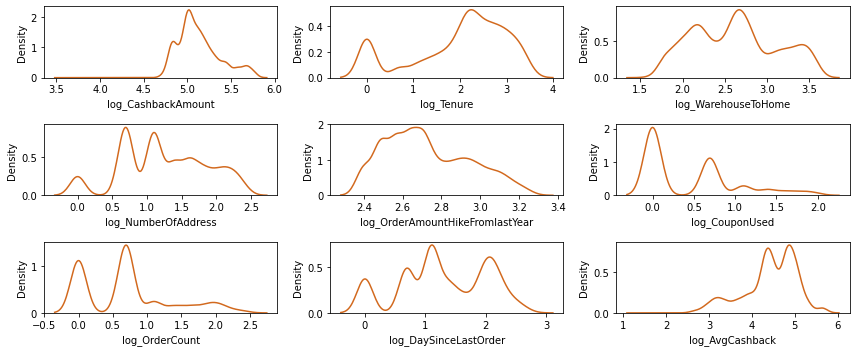

In [ ]:
df_trial = df.copy()
kolom = ['CashbackAmount', 'Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'AvgCashback']
plt.figure(figsize=(12,5))
for i in range(0, len(kolom)):
    plt.subplot(3, 3, i+1)
    nama = 'log_' + kolom[i]
    df_trial[nama] = np.log(df_trial[kolom[i]])
    sns.kdeplot(df_trial[nama], color='chocolate')
    plt.tight_layout()

In [ ]:
df_trial.describe() # log

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,AvgCashback,log_CashbackAmount,log_Tenure,log_WarehouseToHome,log_NumberOfAddress,log_OrderAmountHikeFromlastYear,log_CouponUsed,log_OrderCount,log_DaySinceLastOrder,log_AvgCashback
count,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,...,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000
mean,52802.314136,0.170531,9.802169,1.652954,15.541885,2.929693,3.674271,3.056470,4.196896,0.286462,...,98.740215,5.131161,-inf,2.617242,1.252744,2.726724,-inf,0.702411,-inf,4.428750
std,1627.307193,0.376134,8.179521,0.913900,8.067459,0.702072,1.025263,1.379059,2.544890,0.452150,...,51.936847,0.241671,NaN,0.499341,0.613275,0.217433,NaN,0.644813,NaN,0.619649
min,50001.000000,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,4.111111,3.610918,-inf,1.609438,0.000000,2.397895,-inf,0.000000,-inf,1.413693
25%,51393.750000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,...,63.500000,4.976734,0.693147,2.197225,0.693147,2.564949,0.000000,0.000000,0.693147,4.151040
50%,52783.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,...,89.500000,5.081404,2.197225,2.639057,1.098612,2.708050,0.000000,0.693147,1.098612,4.494239
75%,54208.250000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,...,130.000000,5.257495,2.708050,2.995732,1.791759,2.890372,0.693147,1.098612,1.945910,4.867534
max,55630.000000,1.000000,31.000000,3.000000,36.000000,5.000000,6.000000,5.000000,11.000000,1.000000,...,299.000000,5.780744,3.433987,3.583519,2.397895,3.258097,1.945910,2.397895,2.708050,5.700444


##### Norm

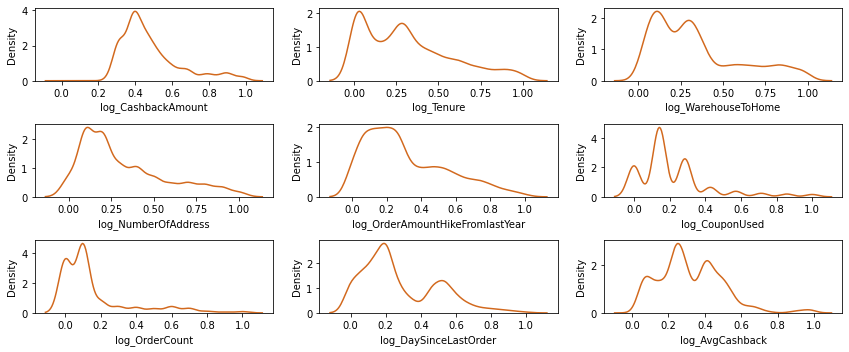

In [ ]:
df_trial = df.copy()
kolom = ['CashbackAmount', 'Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'AvgCashback']
plt.figure(figsize=(12,5))
for i in range(0, len(kolom)):
    plt.subplot(3, 3, i+1)
    nama = 'log_' + kolom[i]
    df_trial[nama] = MinMaxScaler().fit_transform(df_trial[kolom[i]].values.reshape(len(df_trial), 1))
    sns.kdeplot(df_trial[nama], color='chocolate')
    plt.tight_layout()

In [ ]:
df_trial.describe() # Norm

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,AvgCashback,log_CashbackAmount,log_Tenure,log_WarehouseToHome,log_NumberOfAddress,log_OrderAmountHikeFromlastYear,log_CouponUsed,log_OrderCount,log_DaySinceLastOrder,log_AvgCashback
count,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,...,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000
mean,52802.314136,0.170531,9.802169,1.652954,15.541885,2.929693,3.674271,3.056470,4.196896,0.286462,...,98.740215,0.479185,0.316199,0.340061,0.319690,0.310608,0.217331,0.155740,0.281962,0.320897
std,1627.307193,0.376134,8.179521,0.913900,8.067459,0.702072,1.025263,1.379059,2.544890,0.452150,...,51.936847,0.161804,0.263856,0.260241,0.254489,0.238123,0.201506,0.208414,0.217890,0.176123
min,50001.000000,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,4.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51393.750000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,...,63.500000,0.376307,0.064516,0.129032,0.100000,0.133333,0.142857,0.000000,0.133333,0.201394
50%,52783.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,...,89.500000,0.432056,0.290323,0.290323,0.200000,0.266667,0.142857,0.100000,0.200000,0.289563
75%,54208.250000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,...,130.000000,0.540070,0.483871,0.483871,0.500000,0.466667,0.285714,0.200000,0.466667,0.426903
max,55630.000000,1.000000,31.000000,3.000000,36.000000,5.000000,6.000000,5.000000,11.000000,1.000000,...,299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Log Transformation

- Log transformation: `WarehouseToHome` dan `AvgCashback` karena memiliki long right tailed
- Standardization: Semua kolom yang right skew dan kolom yang telah di log transformasi

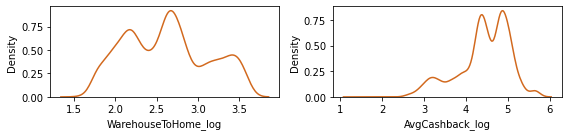

In [ ]:
plt.figure(figsize=(8,2))
kolom = ['WarehouseToHome','AvgCashback']
for i in range(0, len(kolom)):
    plt.subplot(1, 2, i+1)
    nama = kolom[i] + '_log'
    df[nama] = np.log(df[kolom[i]])
    sns.kdeplot(df[nama], color='chocolate')
    plt.tight_layout()

### Standardization

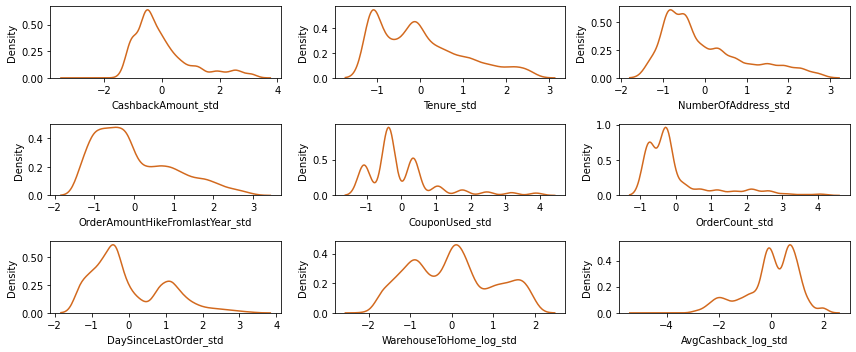

In [ ]:
kolom = ['CashbackAmount', 'Tenure', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 
         'DaySinceLastOrder', 'WarehouseToHome_log', 'AvgCashback_log']
plt.figure(figsize=(12,5))
for i in range(0, len(kolom)):
    plt.subplot(3, 3, i+1)
    nama = kolom[i] + '_std'
    df[nama] = StandardScaler().fit_transform(df[kolom[i]].values.reshape(len(df),1))
    sns.kdeplot(df[nama], color='chocolate')
    plt.tight_layout()

In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,AvgCashback_log,CashbackAmount_std,Tenure_std,NumberOfAddress_std,OrderAmountHikeFromlastYear_std,CouponUsed_std,OrderCount_std,DaySinceLastOrder_std,WarehouseToHome_log_std,AvgCashback_log_std
count,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,...,5348.000000,5.348000e+03,5.348000e+03,5.348000e+03,5.348000e+03,5348.000000,5.348000e+03,5348.000000,5.348000e+03,5.348000e+03
mean,52802.314136,0.170531,9.802169,1.652954,15.541885,2.929693,3.674271,3.056470,4.196896,0.286462,...,4.428750,-6.377347e-17,5.314456e-18,-1.700626e-16,-1.806915e-16,0.000000,-7.440238e-17,0.000000,3.985842e-16,-4.251565e-17
std,1627.307193,0.376134,8.179521,0.913900,8.067459,0.702072,1.025263,1.379059,2.544890,0.452150,...,0.619649,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094,1.000094e+00,1.000094,1.000094e+00,1.000094e+00
min,50001.000000,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.413693,-2.961788e+00,-1.198491e+00,-1.256319e+00,-1.304523e+00,-1.078633,-7.473358e-01,-1.294175,-2.018455e+00,-4.866206e+00
25%,51393.750000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,...,4.151040,-6.358778e-01,-9.539555e-01,-8.633384e-01,-7.445370e-01,-0.369620,-7.473358e-01,-0.682190,-8.412216e-01,-4.482151e-01
50%,52783.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,...,4.494239,-2.912985e-01,-9.807959e-02,-4.703574e-01,-1.845505e-01,-0.369620,-2.674760e-01,-0.376197,4.369202e-02,1.056968e-01
75%,54208.250000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,...,4.867534,3.763239e-01,6.355283e-01,7.085856e-01,6.554292e-01,0.339393,2.123837e-01,0.847774,7.580495e-01,7.081844e-01
max,55630.000000,1.000000,31.000000,3.000000,36.000000,5.000000,6.000000,5.000000,11.000000,1.000000,...,5.700444,3.219103e+00,2.591816e+00,2.673490e+00,2.895375e+00,3.884457,4.051262e+00,3.295716,1.935283e+00,2.052473e+00


## 4. Feature Encoding

- Label Encoding: `Gender`, `MaritalStatus`
- One Hot Encoder: `PreferredLoginDevice`, `PreferredPaymentMode`, `PreferedOrderCat`

In [ ]:
map_gender = {
    'Female' : 0,
    'Male' : 1
}

map_marital = {
    'Single' : 0,
    'Married' : 1
}

df['Gender'] = df['Gender'].map(map_gender)
df['MaritalStatus'] = df['MaritalStatus'].map(map_marital)

In [ ]:
for cat in ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [ ]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Handphone & Accessory,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Others
0,50001,1,4.0,Handphone,3,6.0,Debit Card,0,3.0,3,...,0,0,1,0,0,0,0,0,1,0
1,50002,1,9.0,Handphone,1,8.0,UPI,1,3.0,4,...,0,0,0,0,1,0,0,1,0,0
2,50003,1,9.0,Handphone,1,30.0,Debit Card,1,2.0,4,...,0,0,1,0,0,0,0,1,0,0
3,50004,1,0.0,Handphone,3,15.0,Debit Card,1,2.0,4,...,0,0,1,0,0,0,0,0,1,0
4,50005,1,0.0,Handphone,1,12.0,Credit Card,1,3.0,3,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5348 entries, 0 to 5629
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CustomerID                              5348 non-null   int64  
 1   Churn                                   5348 non-null   int64  
 2   Tenure                                  5348 non-null   float64
 3   PreferredLoginDevice                    5348 non-null   object 
 4   CityTier                                5348 non-null   int64  
 5   WarehouseToHome                         5348 non-null   float64
 6   PreferredPaymentMode                    5348 non-null   object 
 7   Gender                                  5348 non-null   int64  
 8   HourSpendOnApp                          5348 non-null   float64
 9   NumberOfDeviceRegistered                5348 non-null   int64  
 10  PreferedOrderCat                        5348 non-null   obje

### Drop Outdated Column

In [ ]:
df = df.drop(columns = ['CustomerID', 'Tenure', 'PreferredLoginDevice', 'WarehouseToHome', 'PreferredPaymentMode',
                              'PreferedOrderCat', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                              'DaySinceLastOrder', 'CashbackAmount', 'AvgCashback', 'WarehouseToHome_log',
                              'AvgCashback_log']) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5348 entries, 0 to 5629
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Churn                                   5348 non-null   int64  
 1   CityTier                                5348 non-null   int64  
 2   Gender                                  5348 non-null   int64  
 3   HourSpendOnApp                          5348 non-null   float64
 4   NumberOfDeviceRegistered                5348 non-null   int64  
 5   SatisfactionScore                       5348 non-null   int64  
 6   MaritalStatus                           5348 non-null   int64  
 7   Complain                                5348 non-null   int64  
 8   CashbackAmount_std                      5348 non-null   float64
 9   Tenure_std                              5348 non-null   float64
 10  NumberOfAddress_std                     5348 non-null   floa

## 5. Feature Selection

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5]),
 <a list of 29 Text major ticklabel objects>)

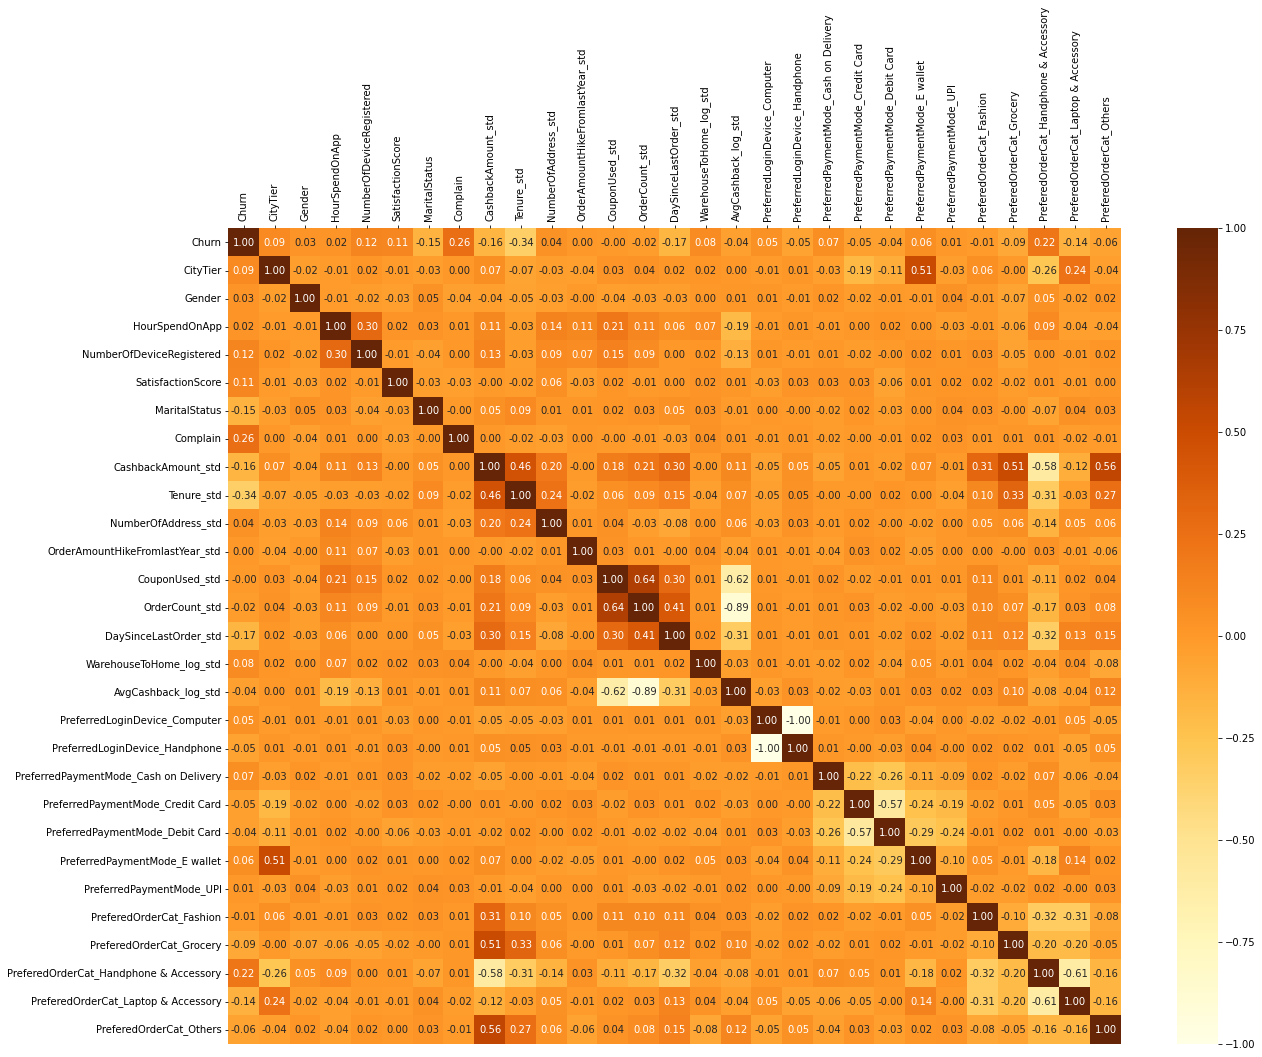

In [ ]:
fig = plt.figure(figsize=(20, 15))
ax = sns.heatmap(df.corr(), cmap='YlOrBr', annot=True, fmt='.2f')
ax.xaxis.tick_top()
plt.xticks(rotation=90)
# plt.savefig('heatmap.png', bbox_inches = 'tight')

Berdasarkan nilai korelasi pada heatmap, feature yang memiliki korelasi tertinggi dengan target adalah Tenure_std dengan nilai -0.34. Oleh karena itu, kami memutuskan untuk membuang feature yang memiliki korelasi dibawah 0.1. Sehingga hanya terdapat 9 feature yang akan kami gunakan pada tahap selanjutnya.

In [ ]:
df_final = df[['Churn', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'MaritalStatus', 'Complain', 'CashbackAmount_std',
                    'Tenure_std', 'DaySinceLastOrder_std', 'PreferedOrderCat_Handphone & Accessory', 
                    'PreferedOrderCat_Laptop & Accessory']]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5348 entries, 0 to 5629
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Churn                                   5348 non-null   int64  
 1   NumberOfDeviceRegistered                5348 non-null   int64  
 2   SatisfactionScore                       5348 non-null   int64  
 3   MaritalStatus                           5348 non-null   int64  
 4   Complain                                5348 non-null   int64  
 5   CashbackAmount_std                      5348 non-null   float64
 6   Tenure_std                              5348 non-null   float64
 7   DaySinceLastOrder_std                   5348 non-null   float64
 8   PreferedOrderCat_Handphone & Accessory  5348 non-null   uint8  
 9   PreferedOrderCat_Laptop & Accessory     5348 non-null   uint8  
dtypes: float64(3), int64(5), uint8(2)
memory usage: 515.5 KB


## 6. Handling Imbalance Data

In [ ]:
df_final['Churn'].value_counts()

0    4436
1     912
Name: Churn, dtype: int64

Dari nilai di atas, terdapat ketimpangan data pada target yaitu kolom `Churn`. Dimana customer yang Churn hanya sebesar 17% dari keseluruhan data pada target. Untuk mengatasinya akan dilakukan oversampling menggunakan SMOTE sehingga dapat meminimalisir terjadinya data duplikat.

In [ ]:
X = df_final.drop('Churn',axis=1)
y = df_final['Churn'].values
print(X.shape)
print(y.shape)

(5348, 9)
(5348,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
from imblearn import over_sampling

In [ ]:
X_over, y_over = over_sampling.SMOTE(random_state=123).fit_resample(X_train, y_train)

In [ ]:
print(X_over.shape)
print(y_over.shape)

(7104, 9)
(7104,)


In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('Train')
print(pd.Series(y_train).value_counts())
print('SMOTE')
print(pd.Series(y_over).value_counts())

Original
0    4436
1     912
dtype: int64
Train
0    3552
1     726
dtype: int64
SMOTE
1    3552
0    3552
dtype: int64
